In [1]:
import tensorflow as tf
import tensorflow_hub as tf_hub

In [2]:
#Check for GPU availability
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


## Getting Data Ready i.e. turning them into tensors

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [4]:
labels_csv = pd.read_csv('data/labels.csv')
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     1a3a594c4fef6d92c9d112a6de31def3  scottish_deerhound
freq                                   1                 126

In [5]:
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

<IPython.core.display.Javascript object>


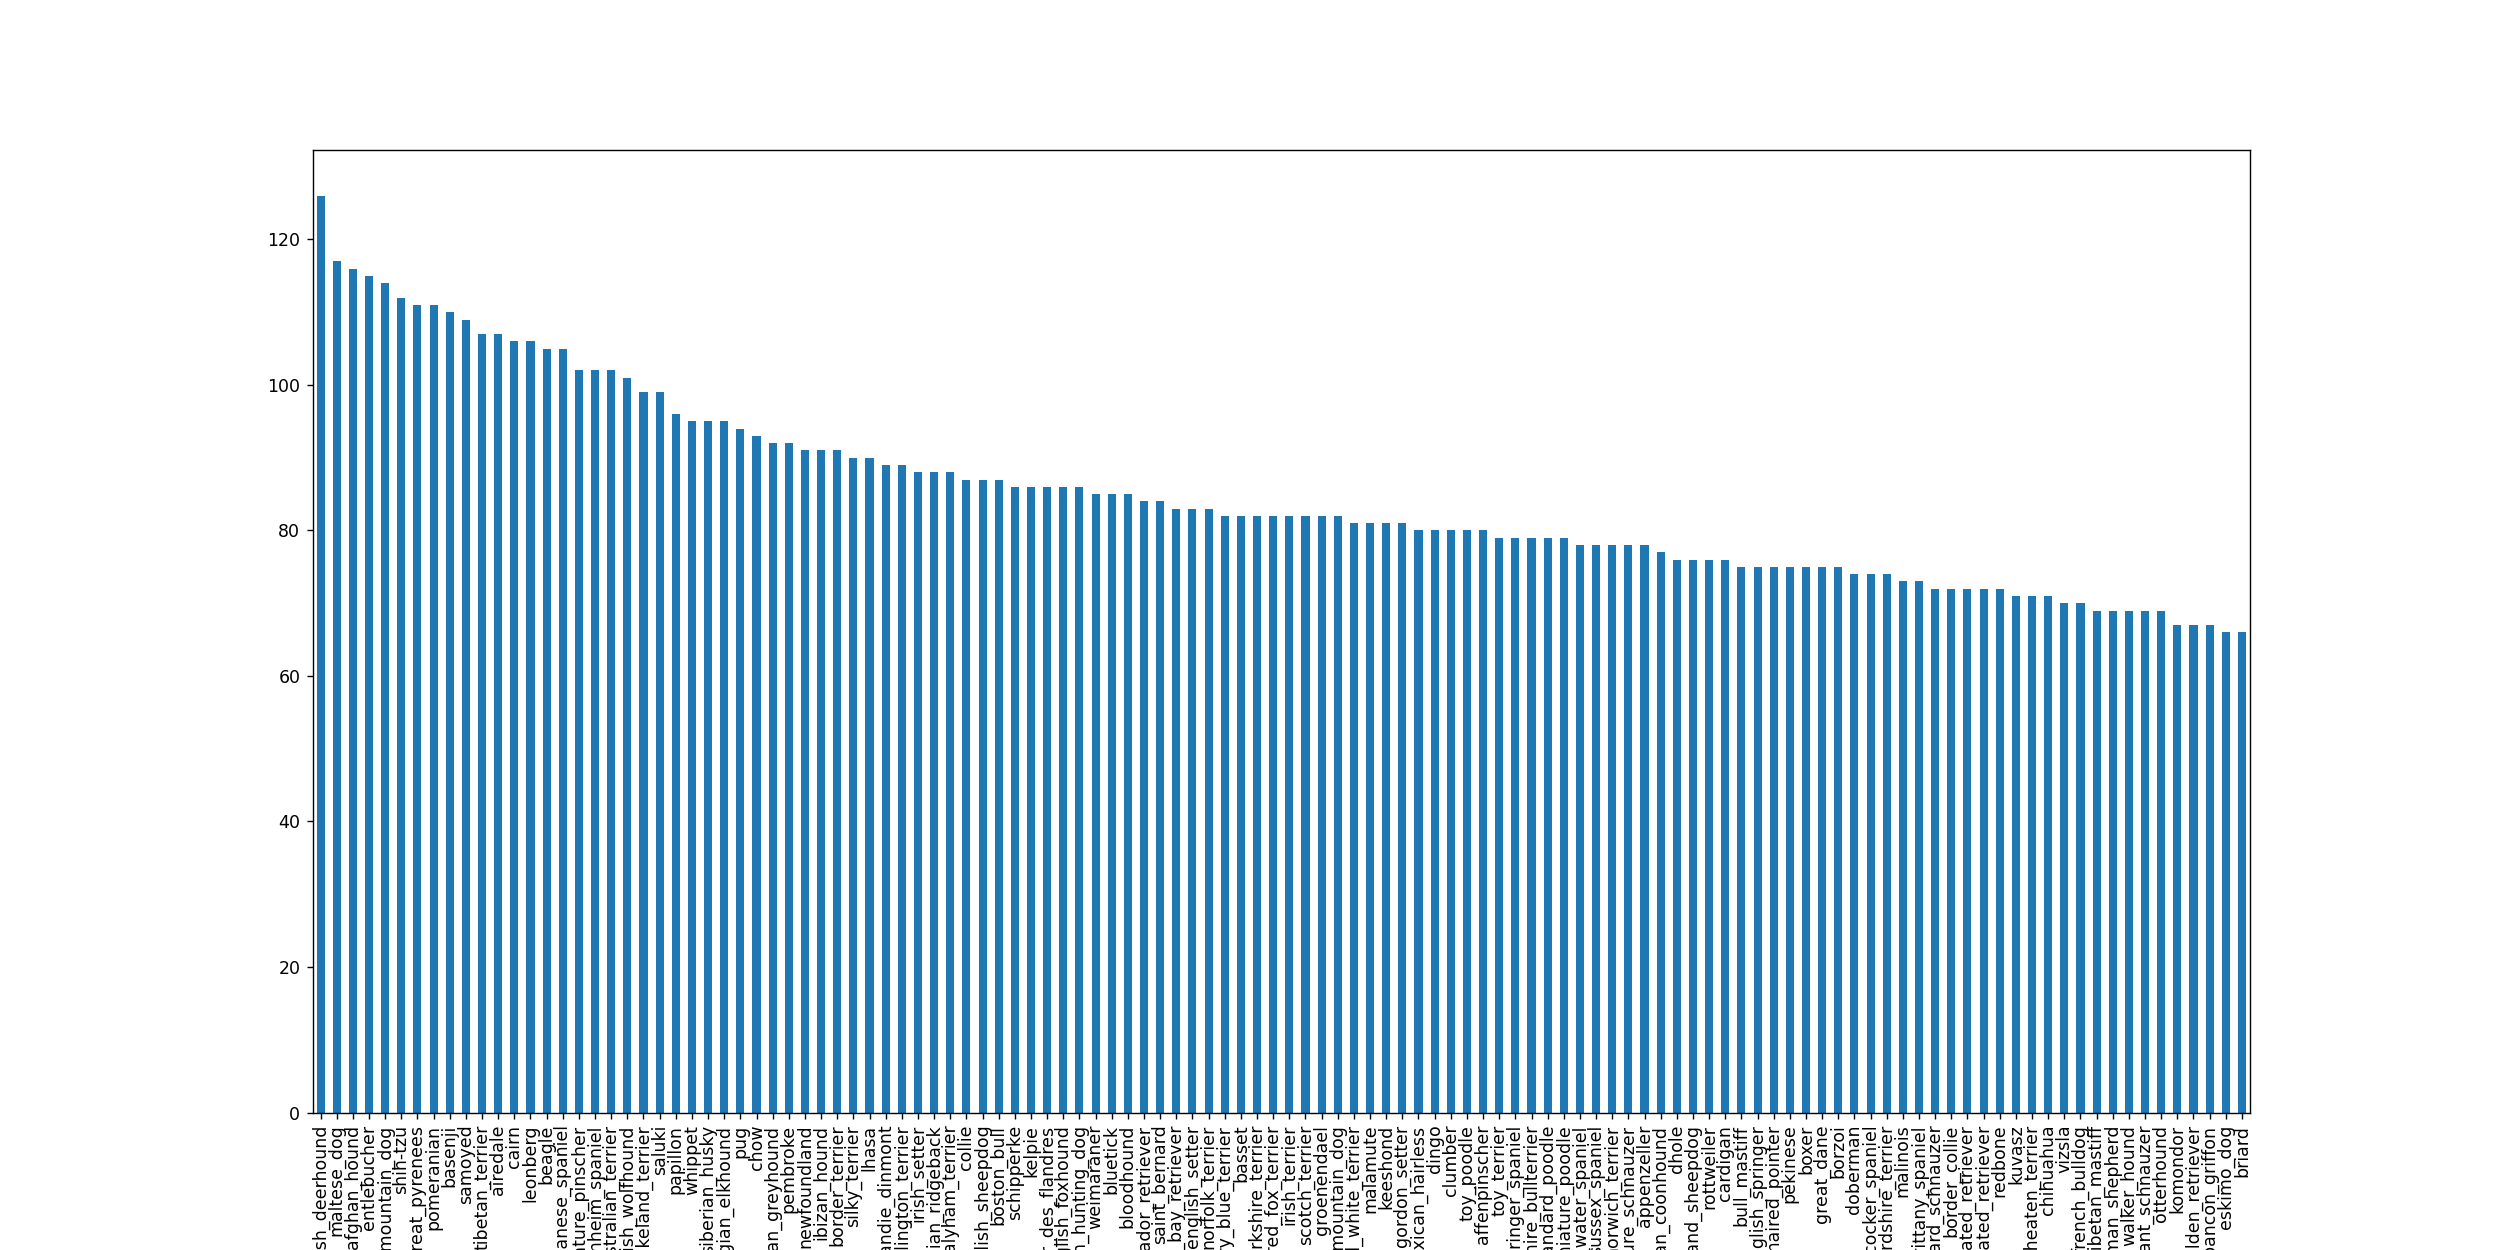

In [6]:
### Images for each Breed
%matplotlib notebook
labels_csv['breed'].value_counts().plot.bar(figsize = (20, 10))

In [7]:
labels_csv.breed.value_counts().median(), labels_csv.breed.value_counts().mean()

(82.0, 85.18333333333334)

## Preparing the Images

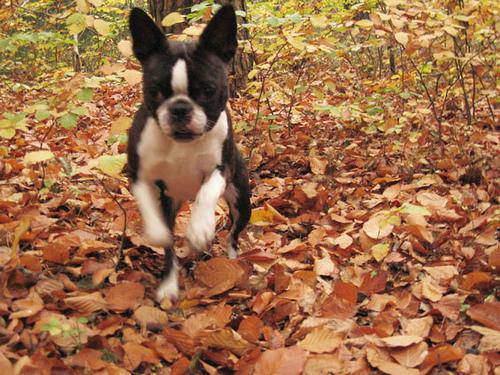

In [8]:
Image.open('data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [9]:
filenames = [f'data/train/{fname}.jpg' for fname in labels_csv.id]

In [10]:
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
len(os.listdir('data/train')) == len(filenames)

True

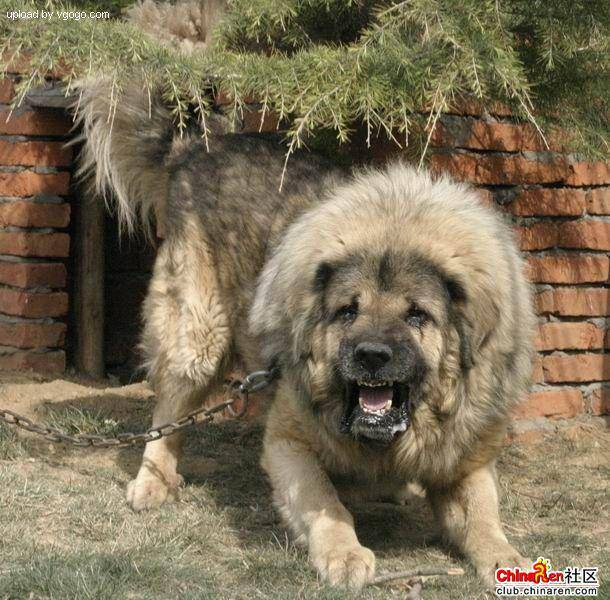

In [12]:
Image.open(filenames[9000])

In [13]:
labels = np.array(labels_csv['breed'])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [14]:
len(labels) == len(os.listdir('data/train/'))

True

In [15]:
unique_breeds = np.unique(labels)

In [16]:
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [17]:
#Turn Every label into a boolean array

boolean_labels = np.array([label == unique_breeds for label in labels])

In [18]:
boolean_labels.shape

(10222, 120)

In [19]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating validation set

In [20]:
X = filenames 
y = boolean_labels

In [21]:
# set number of images to use for experimenting

NUM_IMAGES = 1000

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size = 0.2, 
                                                  random_state = 42) # random state is like np.random.seed()

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [23]:
X_train[:5]

['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

# Preprocessing Images and converting them to tensors

(375, 500, 3)


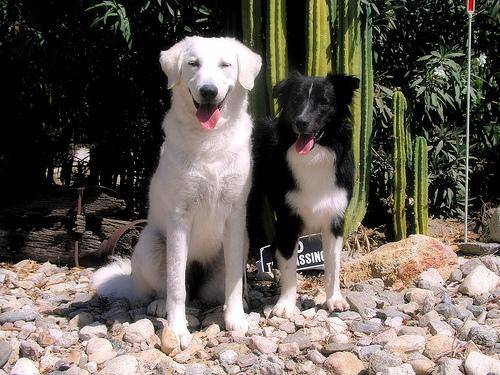

In [24]:
image = Image.open(X_train[12])
print(np.array(image).shape)
image

In [25]:
from matplotlib.pyplot import imread, imshow
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [26]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [27]:
IMAGE_SIZE = 224

def process_image(image_path, IMG_SIZE = IMAGE_SIZE):
    '''
    takes an image file path and turns it into a tensor
    '''
    # read in the image file
    img = tf.io.read_file(image_path)
    
    # turn the jpeg image into a tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    
    # Convert the colour channel values from 0-225 values to 0-1 values
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    # Resize the image to our desired size (224, 244)
    img = tf.image.resize(img, size = [IMG_SIZE, IMG_SIZE])
    
    return img

# Creating Data Batches

In [28]:
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label

In [29]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (x) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
    Also accepts test data as input (no labels).
    """
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                  tf.constant(y))) # labels

        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [30]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [32]:
train_data, val_data

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>)

## Visualizing Data Batches

In [34]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    plt.figure(figsize=(10, 10))
    
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])

        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])

        plt.axis("off")

In [40]:
train_images, train_labels = next(train_data.as_numpy_iterator())

<IPython.core.display.Javascript object>


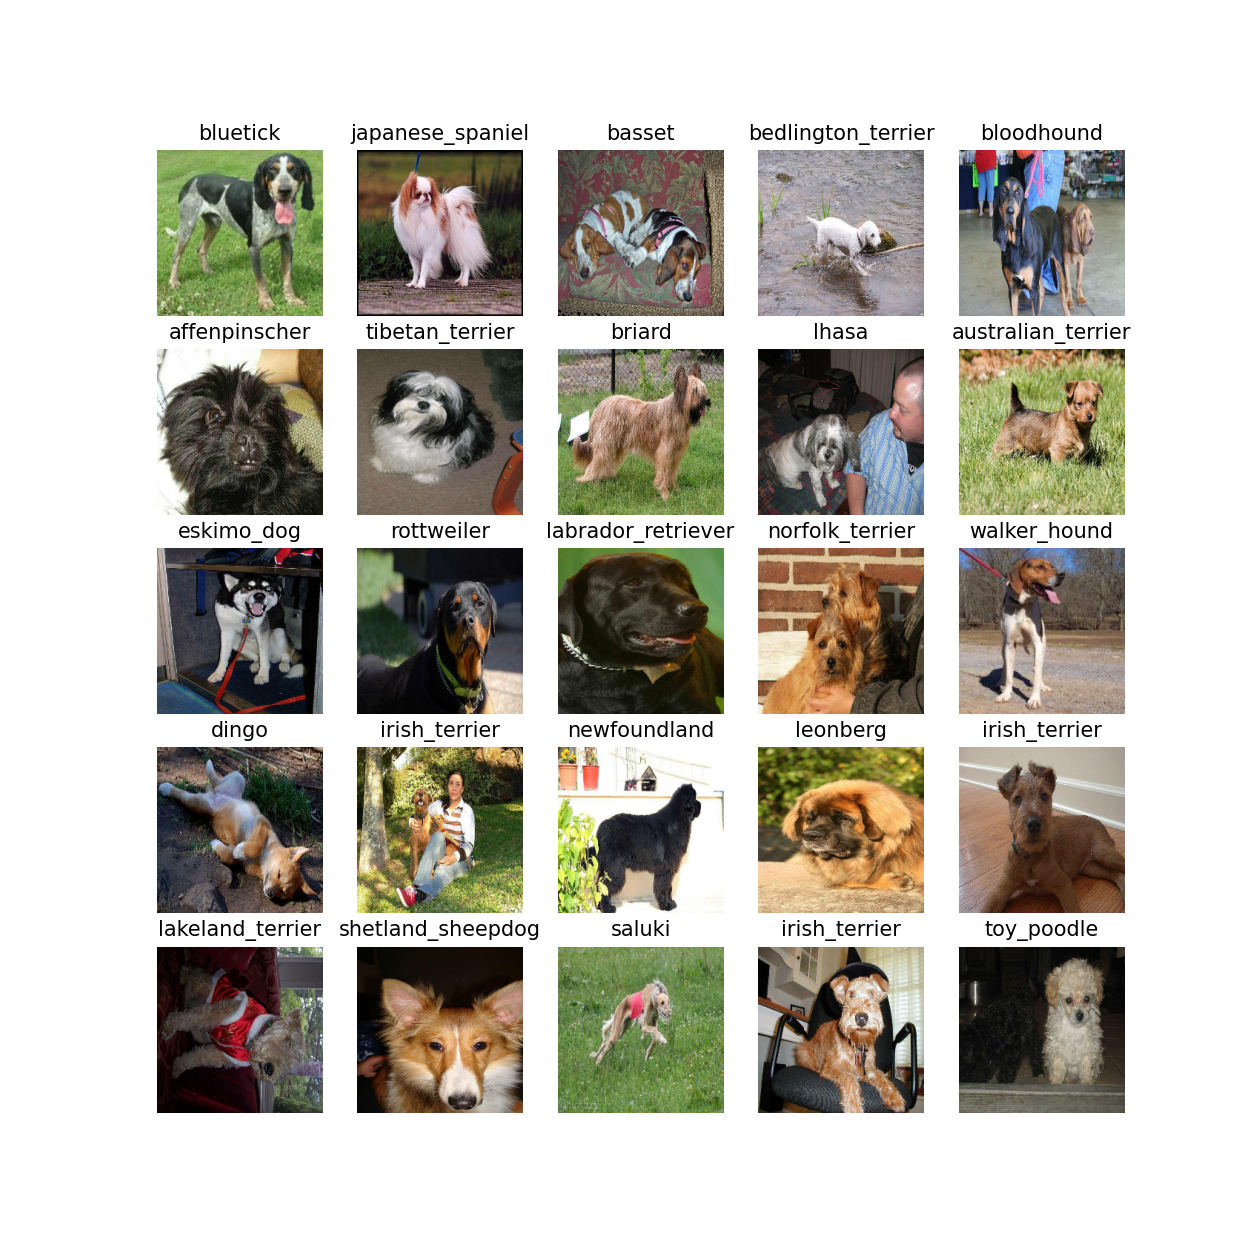

In [42]:
show_25_images(train_images, train_labels)

<IPython.core.display.Javascript object>


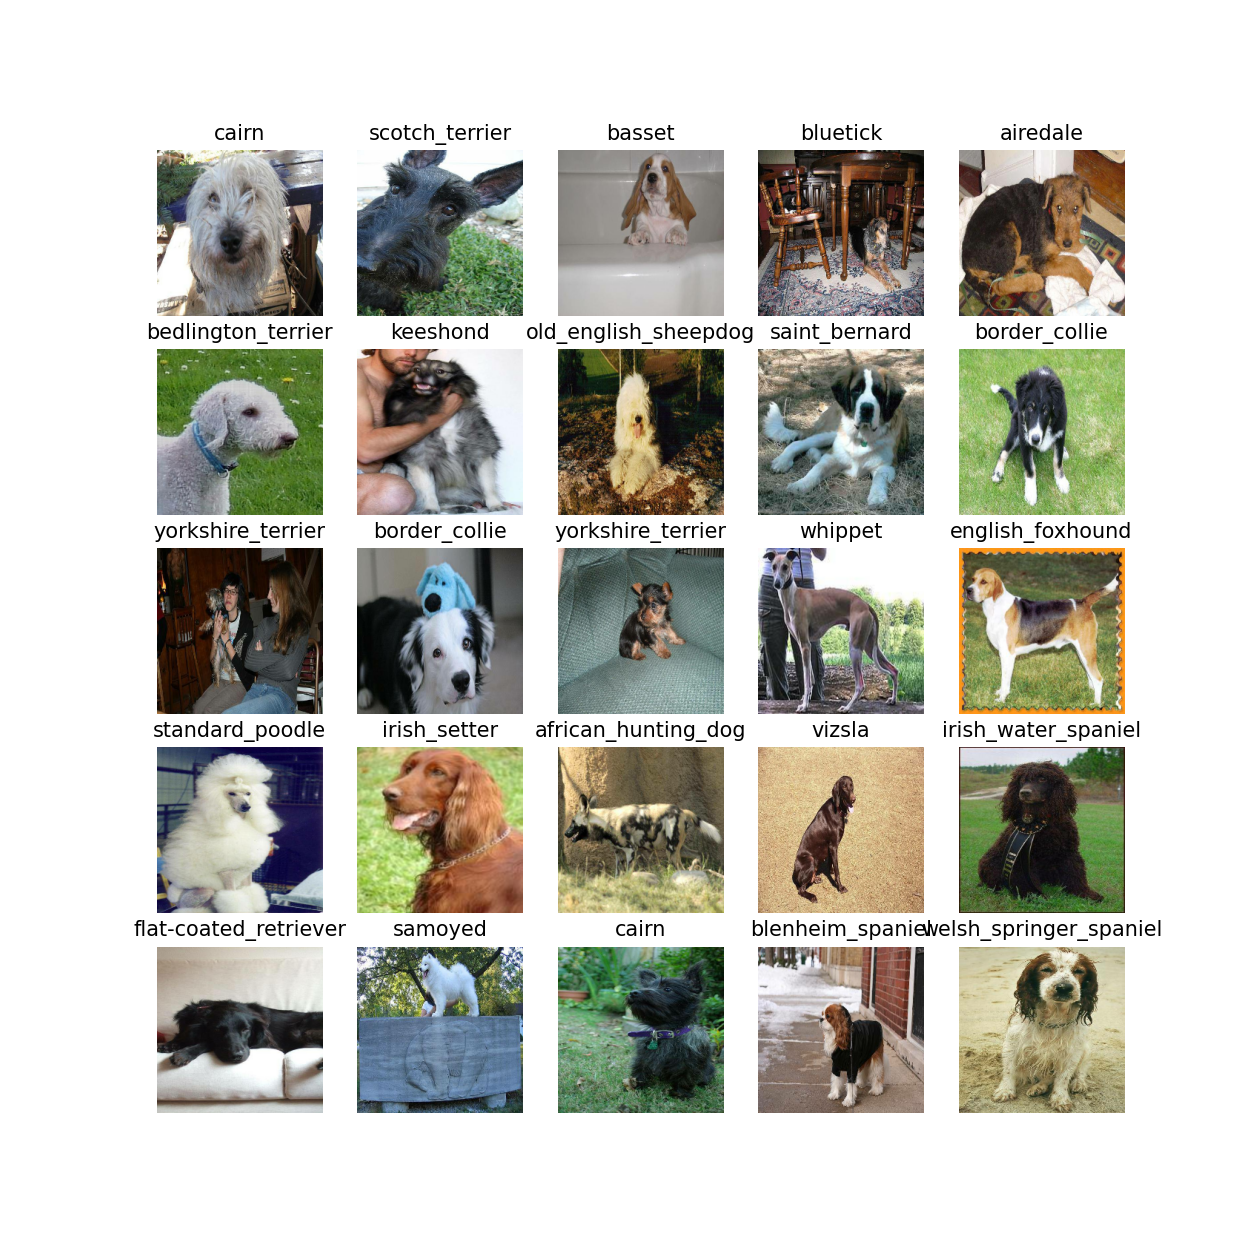

In [43]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

In [45]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"